<a href="https://colab.research.google.com/github/nojihun/save/blob/main/AI_05_%EB%85%B8%EC%A7%80%ED%9B%88_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from google.colab import files
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [5]:
df = pd.read_csv('vgames2.csv')
df = df.dropna() #결측치 제거

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.</p>
연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.</p>
출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [6]:
def my_1(x):# 매출액서 K 와 M을 빼내기 위한 함수
  val= x.find('K')
  val2=x.find('M')
  if val != -1:
    x = x.replace('K','')
    x = float(x)
    x = x*1000
  elif val2 != - 1:
    x=x.replace('M','')
    x=float(x)
    x = x*1000000
  else:
    x = float(x)
  return x

df['NA_Sales']= df['NA_Sales'].apply(my_1)
df['EU_Sales']= df['EU_Sales'].apply(my_1)
df['JP_Sales']= df['JP_Sales'].apply(my_1)
df['Other_Sales']= df['Other_Sales'].apply(my_1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  float64
 7   EU_Sales     16241 non-null  float64
 8   JP_Sales     16241 non-null  float64
 9   Other_Sales  16241 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [117]:
df.head(12)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


In [7]:
a = [] # 연도에 오류가나서 제대로 표시 되지 않은 데이터들을 제거
for i in df['Year']:
  if i < 1900 :
      a.append(i)

de = df[df['Year']<=1899].index
df = df.drop(de)


In [8]:
de = df[df['NA_Sales'] >= 100].index #대박이 나서 평균에 큰 영향을 미치는 것들을 빼는 건데... 이게 맞나??
df = df.drop(de)
de = df[df['EU_Sales']>=100].index
df = df.drop(de)
de = df[df['JP_Sales']>=100].index
df = df.drop(de)
de = df[df['Other_Sales']>=100].index
df = df.drop(de)

In [9]:
df=df.drop(['Unnamed: 0'], axis ='columns' )
df = df.reset_index()
df=df.drop(['index'], axis ='columns' )
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
15692,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
15693,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
15694,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15695,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [10]:
# 장르와 지역

df1= pd.DataFrame(df.groupby(['Genre'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean())
df1= df1.T
df1 = df1.reset_index()
df1

Genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,NA_Sales,0.257654,0.078609,0.261696,0.236346,0.498972,0.217093,0.286687,0.201792,0.444041,0.213549,0.286908,0.101137
1,EU_Sales,0.155841,0.048891,0.117525,0.124603,0.223567,0.091316,0.190537,0.113824,0.239000,0.132110,0.157980,0.066667
2,JP_Sales,0.048209,0.041166,0.102797,0.063598,0.147654,0.102687,0.044395,0.225262,0.029780,0.075463,0.059066,0.071859
3,Other_Sales,0.056349,0.012966,0.042760,0.043512,0.058102,0.022194,0.062853,0.036183,0.078724,0.036476,0.056813,0.016559


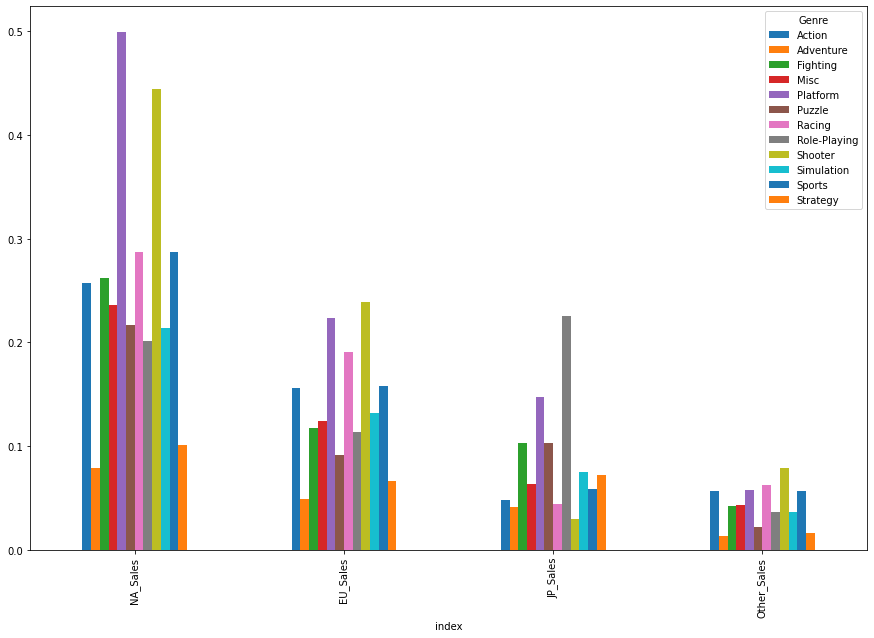

In [11]:
df1.plot(x= 'index', y=['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy'], kind="bar",figsize=(15,10))
plt.show()

In [14]:
from scipy.stats import chi2_contingency

In [26]:
df1 = df1.set_index('index')

In [27]:
chi2_contingency(df1)

(0.4715418107758973,
 1.0,
 33,
 array([[0.254375  , 0.08918508, 0.25767674, 0.22982697, 0.45581255,
         0.21275491, 0.28698809, 0.28334914, 0.38866524, 0.2246901 ,
         0.27534873, 0.12581004],
        [0.13705237, 0.04805121, 0.13883129, 0.12382636, 0.24558306,
         0.11462827, 0.15462368, 0.15266309, 0.20940538, 0.12105872,
         0.14835262, 0.06778404],
        [0.08345379, 0.02925929, 0.08453701, 0.07540022, 0.14954018,
         0.06979932, 0.09415329, 0.09295945, 0.12751091, 0.07371495,
         0.09033472, 0.04127499],
        [0.04317182, 0.01513625, 0.04373219, 0.0390056 , 0.07735925,
         0.03610818, 0.04870683, 0.04808923, 0.06596319, 0.03813379,
         0.04673143, 0.02135213]]))

In [12]:
df2= pd.DataFrame(df.groupby(['Year','Genre'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean())
df2["sum"] = df2[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df2 = pd.DataFrame(df2['sum'])
df2 = df2.reset_index()
df2 = df2.pivot_table(index = 'Year', columns = 'Genre', values = 'sum')
df2= df2.fillna(0)
header = list(df2.columns.values)
df2= df2.reset_index()
df2

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980.0,0.340000,0.000000,0.770000,0.675000,0.000000,0.000000,0.000000,0.000000,3.535000,0.000000,0.000000,0.000000
1,1981.0,0.534167,0.000000,0.000000,0.000000,2.306667,1.125000,0.480000,0.000000,1.002000,0.440000,0.195000,0.000000
2,1982.0,0.361111,0.000000,0.000000,0.870000,1.006000,3.346667,0.785000,0.000000,0.762000,0.000000,0.530000,0.000000
3,1983.0,0.408571,0.400000,0.000000,2.140000,1.386000,0.780000,0.000000,0.000000,0.490000,0.000000,3.200000,0.000000
4,1984.0,1.850000,0.000000,0.000000,1.450000,0.690000,1.046667,1.983333,0.000000,10.366667,0.000000,3.085000,0.000000
5,1985.0,1.760000,0.000000,1.050000,0.000000,13.890000,0.802500,0.000000,0.000000,1.000000,0.040000,1.960000,0.000000
6,1986.0,2.290000,0.000000,0.000000,0.000000,1.668000,0.000000,1.960000,2.520000,0.972500,0.000000,1.860000,0.000000
7,1987.0,0.555000,4.380000,2.710000,0.000000,0.870000,0.000000,0.000000,1.550000,0.345000,0.000000,0.927500,0.000000
8,1988.0,0.870000,0.000000,0.000000,0.000000,6.756667,5.580000,2.140000,1.960000,0.510000,0.030000,1.800000,0.000000
9,1989.0,2.325000,0.000000,0.000000,1.280000,6.886667,9.422500,0.000000,1.100000,1.190000,0.000000,1.906667,0.000000


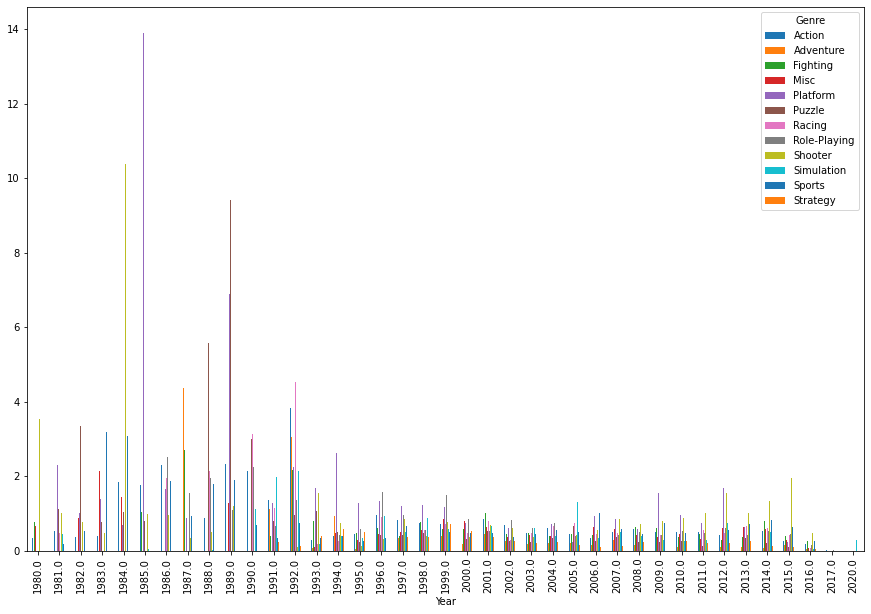

In [13]:
df2.plot(x= 'Year', y= header, kind="bar",figsize=(15,10))
plt.show()

In [28]:
df2 = df2.set_index('Year')

In [31]:
chi, p, n, static = chi2_contingency(df2)
chi, p, n

(305.7536568971036, 0.9999903669560812, 418)